In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib, glob
import cartopy.crs as ccrs
from scipy.signal import savgol_filter
import string
from cartopy.util import add_cyclic_point
from matplotlib import colors

%run ./get_fixed_variables.ipynb # load plotting functions and fixed vars

In [2]:
TS_PI = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_PI.npy')
# TS, surface temp [K]
TS1_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_PI_strato1.npy')
TS1_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_PI_nostrato1.npy')
TS2_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_PI_strato2.npy')
TS2_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_PI_nostrato2.npy')
TS3_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_PI_strato3.npy')
TS3_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_PI_nostrato3.npy')
TS4_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_PI_strato4.npy')

# FSNT, net shortwave at TOA [Wm-2]
FSNT1_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_PI_strato1.npy')
FSNT1_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_PI_nostrato1.npy')
FSNT2_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_PI_strato2.npy')
FSNT2_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_PI_nostrato2.npy')
FSNT3_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_PI_strato3.npy')
FSNT3_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_PI_nostrato3.npy')
FSNT4_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_PI_strato4.npy')

# FLNT, net longwave at TOA [Wm-2]
FLNT1_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_PI_strato1.npy')
FLNT1_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_PI_nostrato1.npy')
FLNT2_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_PI_strato2.npy')
FLNT2_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_PI_nostrato2.npy')
FLNT3_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_PI_strato3.npy')
FLNT3_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_PI_nostrato3.npy')
FLNT4_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_PI_strato4.npy')

In [3]:
# TS, surface temp [K]
TS1_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_8xco2_strato1.npy')
TS1_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_8xco2_nostrato1.npy')
TS2_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_8xco2_strato2.npy')
TS2_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_8xco2_nostrato2.npy')
TS3_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_8xco2_strato3.npy')
TS3_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_8xco2_nostrato3.npy')

# FSNT, net shortwave at TOA [Wm-2]
FSNT1_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_8xco2_strato1.npy')
FSNT1_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_8xco2_nostrato1.npy')
FSNT2_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_8xco2_strato2.npy')
FSNT2_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_8xco2_nostrato2.npy')
FSNT3_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_8xco2_strato3.npy')
FSNT3_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FSNT_8xco2_nostrato3.npy')

# FLNT, net longwave at TOA [Wm-2]
FLNT1_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_8xco2_strato1.npy')
FLNT1_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_8xco2_nostrato1.npy')
FLNT2_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_8xco2_strato2.npy')
FLNT2_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_8xco2_nostrato2.npy')
FLNT3_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_8xco2_strato3.npy')
FLNT3_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLNT_8xco2_nostrato3.npy')

In [4]:
TS1_8xco2 = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_8xco2_spinup1.npy')
TS2_8xco2 = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_8xco2_spinup2.npy')
TS3_8xco2 = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TS_8xco2_spinup3.npy')

In [5]:
FSNT_8xco2_nostrato = np.concatenate([FSNT1_8xco2_nostrato,FSNT2_8xco2_nostrato,FSNT3_8xco2_nostrato])
FLNT_8xco2_nostrato = np.concatenate([FLNT1_8xco2_nostrato,FLNT2_8xco2_nostrato,FLNT3_8xco2_nostrato])
TS_8xco2_nostrato = np.concatenate([TS1_8xco2_nostrato,TS2_8xco2_nostrato,TS3_8xco2_nostrato])

FSNT_8xco2_strato = np.concatenate([FSNT1_8xco2_strato,FSNT2_8xco2_strato,FSNT3_8xco2_strato])
FLNT_8xco2_strato = np.concatenate([FLNT1_8xco2_strato,FLNT2_8xco2_strato,FLNT3_8xco2_strato])
TS_8xco2_strato = np.concatenate([TS1_8xco2_strato,TS2_8xco2_strato,TS3_8xco2_strato])

TS_1xco2_strato = np.concatenate([TS1_1xco2_strato,TS2_1xco2_strato,TS3_1xco2_strato,TS4_1xco2_strato])
FLNT_1xco2_strato = np.concatenate([FLNT1_1xco2_strato,FLNT2_1xco2_strato,FLNT3_1xco2_strato,FLNT4_1xco2_strato])
FSNT_1xco2_strato = np.concatenate([FSNT1_1xco2_strato,FSNT2_1xco2_strato,FSNT3_1xco2_strato,FSNT4_1xco2_strato])

TS_1xco2_nostrato = np.concatenate([TS1_1xco2_nostrato,TS2_1xco2_nostrato,TS3_1xco2_nostrato])[:-1]
FLNT_1xco2_nostrato = np.concatenate([FLNT1_1xco2_nostrato,FLNT2_1xco2_nostrato,FLNT3_1xco2_nostrato])[:-1]
FSNT_1xco2_nostrato = np.concatenate([FSNT1_1xco2_nostrato,FSNT2_1xco2_nostrato,FSNT3_1xco2_nostrato])[:-1]


TS_8xco2 = np.concatenate([TS1_8xco2,TS2_8xco2,TS3_8xco2])



In [6]:
TOA_8xco2_nostrato = FSNT_8xco2_nostrato - FLNT_8xco2_nostrato
shape =int(np.shape(TOA_8xco2_nostrato)[0]/12)
TOA_8xco2_nostrato_greg = np.sum(np.average(np.average(TOA_8xco2_nostrato.reshape(shape,12,96,144), axis = 1),axis=-1)*gw,axis=-1)/np.sum(gw)
TS_8xco2_nostrato_greg = np.sum(np.average(np.average(TS_8xco2_nostrato.reshape(shape,12,96,144), axis = 1),axis=-1)*gw,axis=-1)/np.sum(gw)

TOA_8xco2_nostrato_greg_dec = np.sum(np.average(np.average(np.average(TOA_8xco2_nostrato.reshape(int(shape/10),10,12,96,144), axis = 1),axis=1),axis=-1)*gw,axis=-1)/np.sum(gw)
TS_8xco2_nostrato_greg_dec = np.sum(np.average(np.average(np.average(TS_8xco2_nostrato.reshape(int(shape/10),10,12,96,144), axis = 1),axis=1),axis=-1)*gw,axis=-1)/np.sum(gw)

TOA_8xco2_strato = FSNT_8xco2_strato[:-5*12] - FLNT_8xco2_strato[:-5*12]
shape =int(np.shape(TOA_8xco2_strato)[0]/12)
TOA_8xco2_strato_greg = np.sum(np.average(np.average(TOA_8xco2_strato.reshape(shape,12,96,144), axis = 1),axis=-1)*gw,axis=-1)/np.sum(gw)
TS_8xco2_strato_greg = np.sum(np.average(np.average(TS_8xco2_strato[:-5*12].reshape(shape,12,96,144), axis = 1),axis=-1)*gw,axis=-1)/np.sum(gw)

TOA_8xco2_strato_greg_dec = np.sum(np.average(np.average(np.average(TOA_8xco2_strato.reshape(int(shape/10),10,12,96,144), axis = 1),axis=1),axis=-1)*gw,axis=-1)/np.sum(gw)
TS_8xco2_strato_greg_dec = np.sum(np.average(np.average(np.average(TS_8xco2_strato[:-5*12].reshape(int(shape/10),10,12,96,144), axis = 1),axis=1),axis=-1)*gw,axis=-1)/np.sum(gw)

In [7]:
TOA_1xco2_nostrato = FSNT_1xco2_nostrato - FLNT_1xco2_nostrato
shape =int(np.shape(TOA_1xco2_nostrato[:])[0]/12)
TOA_1xco2_nostrato_greg = np.sum(np.average(np.average(TOA_1xco2_nostrato.reshape(shape,12,96,144), axis = 1),axis=-1)*gw,axis=-1)/np.sum(gw)
TS_1xco2_nostrato_greg = np.sum(np.average(np.average(TS_1xco2_nostrato.reshape(shape,12,96,144), axis = 1),axis=-1)*gw,axis=-1)/np.sum(gw)

TOA_1xco2_nostrato_greg_dec = np.sum(np.average(np.average(np.average(TOA_1xco2_nostrato.reshape(int(shape/10),10,12,96,144), axis = 1),axis=1),axis=-1)*gw,axis=-1)/np.sum(gw)
TS_1xco2_nostrato_greg_dec = np.sum(np.average(np.average(np.average(TS_1xco2_nostrato.reshape(int(shape/10),10,12,96,144), axis = 1),axis=1),axis=-1)*gw,axis=-1)/np.sum(gw)

TOA_1xco2_strato = FSNT_1xco2_strato - FLNT_1xco2_strato
shape =int(np.shape(TOA_1xco2_strato)[0]/12)
TOA_1xco2_strato_greg = np.sum(np.average(np.average(TOA_1xco2_strato.reshape(shape,12,96,144), axis = 1),axis=-1)*gw,axis=-1)/np.sum(gw)
TS_1xco2_strato_greg = np.sum(np.average(np.average(TS_1xco2_strato.reshape(shape,12,96,144), axis = 1),axis=-1)*gw,axis=-1)/np.sum(gw)

TOA_1xco2_strato_greg_dec = np.sum(np.average(np.average(np.average(TOA_1xco2_strato.reshape(int(shape/10),10,12,96,144), axis = 1),axis=1),axis=-1)*gw,axis=-1)/np.sum(gw)
TS_1xco2_strato_greg_dec = np.sum(np.average(np.average(np.average(TS_1xco2_strato.reshape(int(shape/10),10,12,96,144), axis = 1),axis=1),axis=-1)*gw,axis=-1)/np.sum(gw)

In [8]:
TS_8xco2_diff_greg = TS_8xco2_nostrato_greg-TS_8xco2_strato_greg
TOA_8xco2_diff_greg = TOA_8xco2_nostrato_greg-TOA_8xco2_strato_greg
TS_8xco2_diff_greg_dec = TS_8xco2_nostrato_greg_dec-TS_8xco2_strato_greg_dec
TOA_8xco2_diff_greg_dec = TOA_8xco2_nostrato_greg_dec-TOA_8xco2_strato_greg_dec


TS_1xco2_diff_greg = TS_1xco2_nostrato_greg-TS_1xco2_strato_greg
TOA_1xco2_diff_greg = TOA_1xco2_nostrato_greg-TOA_1xco2_strato_greg
TS_1xco2_diff_greg_dec = TS_1xco2_nostrato_greg_dec-TS_1xco2_strato_greg_dec
TOA_1xco2_diff_greg_dec = TOA_1xco2_nostrato_greg_dec-TOA_1xco2_strato_greg_dec

In [9]:
avg_t_piControl = GMST_avg(TS_PI)
avg_t_piControl_strato = GMST_avg(TS_1xco2_strato)
avg_t_piControl_nostrato = GMST_avg(TS_1xco2_nostrato)

avg_t_x8co2 = GMST_avg(TS_8xco2)
avg_t_x8co2_strato = GMST_avg(TS_8xco2_strato)
avg_t_x8co2_nostrato = GMST_avg(TS_8xco2_nostrato)

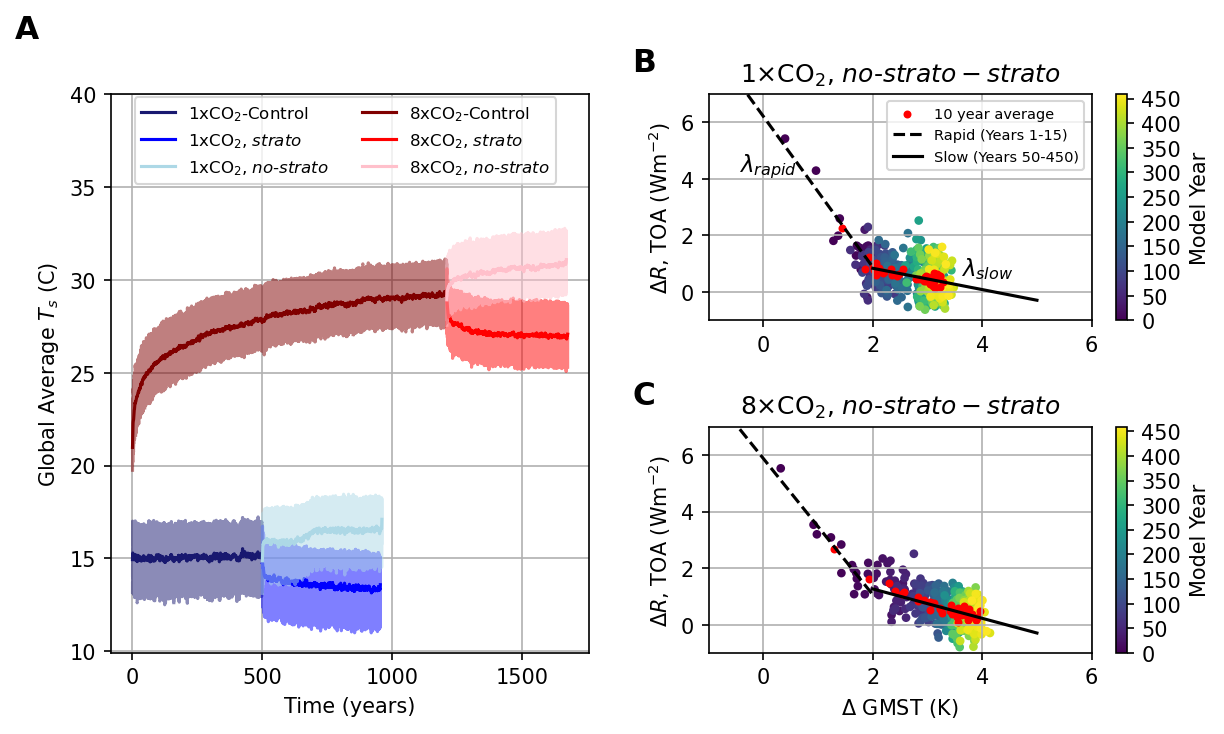

In [10]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(12, 5), dpi=150)
gs = GridSpec(2, 3, width_ratios=[1.5, 1.5,1.5])
ax1 = fig.add_subplot(gs[:, 0])
alpha= 0.5
time = np.arange(0, len(avg_t_piControl))
ax1.plot(time/12, np.array(avg_t_piControl)-273, color='midnightblue', linestyle='--', alpha = alpha)
ax1.plot(time/12, savgol_filter(avg_t_piControl, 24, 1)-273,color='midnightblue', label = '1xCO$_2$-Control')

time = np.arange(len(avg_t_piControl), len(avg_t_piControl)+len(avg_t_piControl_strato[:-6*12]))

ax1.plot(time/12, np.array(avg_t_piControl_strato[:-6*12])-273, 'b-', alpha = alpha)
ax1.plot(time/12, savgol_filter(avg_t_piControl_strato[:-6*12], 24, 1)-273,'b', label = '1xCO$_2$, $\\it{strato}$')

time = np.arange(len(avg_t_piControl), len(avg_t_piControl)+len(avg_t_piControl_nostrato))

ax1.plot(time/12, np.array(avg_t_piControl_nostrato)-273, color='lightblue', alpha = alpha)
ax1.plot(time/12, savgol_filter(avg_t_piControl_nostrato, 24, 1)-273,color='lightblue',linestyle='-', label = '1xCO$_2$, $\\it{no}$-$\\it{strato}$')

time = np.arange(0, len(avg_t_x8co2))

ax1.plot(time/12, np.array(avg_t_x8co2)-273, color='maroon', linestyle='--', alpha = alpha)
ax1.plot(time/12, savgol_filter(avg_t_x8co2, 24, 1)-273,color='maroon', label = '8xCO$_2$-Control')

time_strato = np.arange(len(avg_t_x8co2), len(avg_t_x8co2)+len(avg_t_x8co2_strato))

ax1.plot(time_strato/12, np.array(avg_t_x8co2_strato)-273, color = 'r', linestyle='-', alpha = alpha)
ax1.plot(time_strato/12, savgol_filter(avg_t_x8co2_strato, 24, 1)-273,color = 'r', linestyle='-', label = '8xCO$_2$, $\\it{strato}$')

time_nostrato = np.arange(len(avg_t_x8co2), len(avg_t_x8co2)+len(avg_t_x8co2_nostrato))

ax1.plot(time_nostrato/12, np.array(avg_t_x8co2_nostrato)-273, color = 'pink', linestyle='-', alpha = alpha)
ax1.plot(time_nostrato/12, savgol_filter(avg_t_x8co2_nostrato, 24, 1)-273,color = 'pink', linestyle='-', label = '8xCO$_2$, $\\it{no}$-$\\it{strato}$')



ax1.legend(ncol=2, fontsize=8, loc = (0.05,0.84))
ax1.set_yticks([10,15,20,25,30,35,40])
ax1.grid()
ax1.set_ylabel('Global Average $T_s$ (C)') 
ax1.set_xlabel('Time (years)')

ax2 = fig.add_subplot(gs[0, 1])

m_rapid_1xco2,b_rapid_1xco2 = np.polyfit(TS_1xco2_diff_greg[:15], TOA_1xco2_diff_greg[:15],1)
m_slow_1xco2,b_slow_1xco2 = np.polyfit(TS_1xco2_diff_greg[50:], TOA_1xco2_diff_greg[50:],1)
x_slow_list = np.linspace(2,5,100)
x_rapid_list = np.linspace(-1,2,100)
time = np.arange(0, len(TS_1xco2_nostrato_greg),1)
c = ax2.scatter(TS_1xco2_diff_greg, TOA_1xco2_diff_greg, c=time,s=10, cmap = 'viridis')
plt.colorbar(c,ticks = [0,50,100,150,200,250,300,350,400,450],ax = ax2,label = 'Model Year')
ax2.scatter(TS_1xco2_diff_greg_dec, TOA_1xco2_diff_greg_dec, c='red', marker='o',s=8, label = '10 year average')
ax2.plot(x_rapid_list, m_rapid_1xco2*x_rapid_list+b_rapid_1xco2, 'k--', label = 'Rapid (Years 1-15)')
ax2.plot(x_slow_list, m_slow_1xco2*x_slow_list+b_slow_1xco2, 'k-', label = 'Slow (Years 50-450)')
ax2.grid()
ax2.set_ylim(-1,7)
ax2.set_xlim(-1, 6)
ax2.legend(fontsize=7)
ax2.set_ylabel('$\\Delta R$, TOA (Wm$^{-2}$)')
#ax2.set_xlabel('$\\Delta$ GMST (K)')
ax2.set_title('1$\\times$CO$_2$, $\\it{no}$-$\\it{strato} - \\it{strato}$')

ax3 = fig.add_subplot(gs[1, 1])

m_rapid_8xco2,b_rapid_8xco2 = np.polyfit(TS_8xco2_diff_greg[:15], TOA_8xco2_diff_greg[:15],1)
m_slow_8xco2,b_slow_8xco2 = np.polyfit(TS_8xco2_diff_greg[50:], TOA_8xco2_diff_greg[50:],1)
x_list = np.linspace(2,5,100)
time = np.arange(0, len(TS_8xco2_nostrato_greg),1)
c = ax3.scatter(TS_8xco2_diff_greg, TOA_8xco2_diff_greg, c=time,s=10, cmap = 'viridis')
plt.colorbar(c,ticks = [0,50,100,150,200,250,300,350,400,450],ax = ax3,label = 'Model Year')
ax3.scatter(TS_8xco2_diff_greg_dec, TOA_8xco2_diff_greg_dec, c='red', marker='o',s=8, label = '10 year average')
ax3.plot(x_slow_list, m_slow_8xco2*x_slow_list+b_slow_8xco2, 'k-', label = 'Slow (Years 50-450)')
ax3.plot(x_rapid_list, m_rapid_8xco2*x_rapid_list+b_rapid_8xco2, 'k--', label = 'Linear Fit (Years 1-15)')
ax3.grid()
ax3.set_ylim(-1,7)
ax3.set_xlim(-1, 6)
#ax3.legend()
ax3.set_ylabel('$\\Delta R$, TOA (Wm$^{-2}$)')
ax3.set_xlabel('$\\Delta$ GMST (K)')
ax3.set_title('8$\\times$CO$_2$, $\\it{no}$-$\\it{strato} - \\it{strato}$')


ax2.annotate('$\\lambda_{rapid}$', xy=(0.08, 0.66), xycoords="axes fraction",fontsize=11)
ax2.annotate('$\\lambda_{slow}$', xy=(0.66, 0.2), xycoords="axes fraction",fontsize=11)
ax1.annotate('A', xy=(-0.2, 1.1), xycoords="axes fraction",fontsize=15, weight = 'bold')
ax2.annotate('B', xy=(-0.2, 1.1), xycoords="axes fraction",fontsize=15, weight = 'bold')
ax3.annotate('C', xy=(-0.2, 1.1), xycoords="axes fraction",fontsize=15, weight = 'bold')
plt.tight_layout(pad=1.04)
plt.savefig('./Figure_PDFs/Figure_3.png', dpi=300, bbox_inches = 'tight')

In [11]:
print('Initial radiative forcing (at delta_T = 0) is: ' + str(np.round(b_rapid_1xco2,2)) + ' Wm-2 (1xco2), ' + str(np.round(b_rapid_8xco2,2)) + ' Wm-2 (8xco2)')
print('lambda_rapid is: ' + str(np.round(-m_rapid_1xco2,2)) + ' Wm-2/K (1xco2), ' + str(np.round(-m_rapid_8xco2,2)) + ' Wm-2/K (8xco2)')
print('lambda_slow is: ' + str(np.round(-m_slow_1xco2,2)) + ' Wm-2/K (1xco2), ' + str(np.round(-m_slow_8xco2,2)) + ' Wm-2/K (8xco2)')
print('Equilibrium delta_T: ' + str(np.round(-b_slow_1xco2/m_slow_1xco2,2)) + ' K (1xco2), ' + str(np.round(-b_slow_8xco2/m_slow_8xco2,2)) + ' K (8xco2)')

Initial radiative forcing (at delta_T = 0) is: 6.21 Wm-2 (1xco2), 5.88 Wm-2 (8xco2)
lambda_rapid is: 2.66 Wm-2/K (1xco2), 2.41 Wm-2/K (8xco2)
lambda_slow is: 0.38 Wm-2/K (1xco2), 0.52 Wm-2/K (8xco2)
Equilibrium delta_T: 4.23 K (1xco2), 4.44 K (8xco2)


In [12]:
## estimate total lambda as delta_Teq/delta_Ro

print('lambda_total is: ' + str(np.round(-b_slow_1xco2/m_slow_1xco2/b_rapid_1xco2,2)) + ' K/Wm-2 (1xco2), ' + str(np.round(-b_slow_8xco2/m_slow_8xco2/b_rapid_8xco2,2)) + ' K/Wm-2 (8xco2)')

lambda_total is: 0.68 K/Wm-2 (1xco2), 0.76 K/Wm-2 (8xco2)
